# Libraries

In [121]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [122]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [123]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [124]:
from geopy.geocoders import Nominatim

### Explore neighboorhood using BeautifulSoup ###

In [125]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
data_html = BeautifulSoup(result.content)

### Read the data into a Pandas Dataframe ###

In [126]:
soup = BeautifulSoup(str(data_html))
neigh = soup.find('table')
table_str = str(neigh.extract())

In [127]:
df = pd.read_html(table_str)[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Remove Not assigned Boroughs ### 

In [128]:
df_dropna = df[df.Borough != 'Not assigned'].reset_index(drop=True)

### Rename Postal Code to PostalCode ### 

In [129]:
df_dropna.rename(columns={'Postal Code' : 'PostalCode'}, inplace=True)
df = df_dropna
df.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Group Borough Data ###

In [130]:
df_grouped = df.groupby(['Borough', 'PostalCode'], as_index=False).agg(lambda x:','.join(x))
df_grouped.head()

,Borough,PostalCode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


### Examine Neighborhoods Not Assigned ###

In [131]:
df_grouped.loc[df_grouped['Borough'].isin(["Not assigned"])]

,Borough,PostalCode,Neighbourhood


### Shape ###

In [132]:
df = df_grouped

In [133]:
df.shape

(103, 3)

### Rearranged so the PostalCode appears first ###

In [134]:
df = df.groupby(["PostalCode", "Borough"])["Neighbourhood"].apply(", ".join).reset_index()
df.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [135]:
cor_url = "https://cocl.us/Geospatial_data"
cor_url

'https://cocl.us/Geospatial_data'

In [136]:
cor_url = "https://cocl.us/Geospatial_data"

df_geo = pd.read_csv(cor_url)
df_geo.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [137]:
# Merging the Data
df = pd.merge(df, df_geo, on='PostalCode')
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [138]:
df_toronto = df
df_toronto.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [139]:
#Create list with the Boroughs 
boroughs = df_toronto['Borough'].unique().tolist()

In [140]:
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [141]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


### Latitudes and Longitudes aligned to the different PostalCodes ###

In [142]:
cor_url = "https://cocl.us/Geospatial_data"

df_geo = pd.read_csv(cor_url)
df_geo.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Data Merging ###

In [143]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# Latitude and Longitude of Toronto #

In [144]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


### Toronto map ###

In [145]:
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

### Toronto map with marks ###

In [146]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighbourhood']):
    label_text = borough + ' - ' + neighbourhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto

#  Foursquare Credentials #

In [147]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
VERSION = '20200514' # Foursquare API version

print('Credentials Stored')

Credentials Stored


#### Exploring the first neighbourhood in df_toronto ### 

In [148]:
neighborhood_name = df_toronto.loc[0, 'Neighbourhood']
print(f"The first neighbourhood's name is '{neighborhood_name}'.")

The first neighbourhood's name is 'Malvern, Rouge'.


### Latitude and longitude values of Toronto ###

In [149]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


### Top 100 venues within a radius of 500 meter near the Beaches ###

In [150]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

### Extraction of the venue ###

In [151]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the json and structure it into a pandas dataframe ###

In [152]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


### Create the GET request URL ###

In [153]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Venues for all neighborhoods in our dataset ###

In [154]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

In [155]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


### Count venues per neighborhood ###

In [156]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,8,8,8,8,8,8


### Count unique venues ###

In [157]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


In [158]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Fast Food Restaurant' 'Bar' 'Construction & Landscaping' 'Bank'
 'Electronics Store' 'Restaurant' 'Mexican Restaurant'
 'Rental Car Location' 'Medical Center' 'Intersection' 'Breakfast Spot'
 'Coffee Shop' 'Korean BBQ Restaurant' 'Caribbean Restaurant'
 'Hakka Restaurant' 'Thai Restaurant' 'Athletics & Sports' 'Gas Station'
 'Bakery' 'Fried Chicken Joint' 'Playground' 'Jewelry Store' 'Smoke Shop'
 'Department Store' 'Hobby Shop' 'Train Station' 'Ice Cream Shop'
 'Bus Line' 'Metro Station' 'Bus Station' 'Park' 'Soccer Field' 'Motel'
 'American Restaurant' 'Café' 'General Entertainment' 'Skating Rink'
 'College Stadium' 'Chinese Restaurant' 'Indian Restaurant' 'Pet Store'
 'Vietnamese Restaurant' 'Sandwich Place' 'Middle Eastern Restaurant'
 'Auto Garage' 'Accessories Store' 'Latin American Restaurant' 'Lounge'
 'Clothing Store' 'Italian Restaurant' 'Noodle House' 'Pizza Place'
 'Pharmacy' 'Grocery Store' 'Gym' 'Golf Course' 'Pool'
 'Mediterranean Restaurant' '

### Is there Vegetarian / Vegan Restaurant in the venues? ###

In [159]:
"Vegetarian / Vegan Restaurant" in toronto_venues['Venue Category'].unique()

True

# Analyze each neighborhood #

In [160]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2141, 274)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grouping rows by neighborhood taking the mean of the frequency of occurrence of each category ###

In [161]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 274)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
fd = to_grouped[["Neighbourhoods","Vegetarian / Vegan Restaurant"]]
fd.head()

,Neighbourhoods,Vegetarian / Vegan Restaurant
0,Agincourt,0.0
1,"Alderwood, Long Branch",0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0
3,Bayview Village,0.0
4,"Bedford Park, Lawrence Manor East",0.0


In [163]:
fd = fd.rename(columns={'Neighbourhoods':'Neighbourhood'})

### Clustering the neighborhoods ###

In [164]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = fd.drop(['Neighbourhood'], axis=1)

In [165]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [166]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

Text(0, 0.5, 'Error')

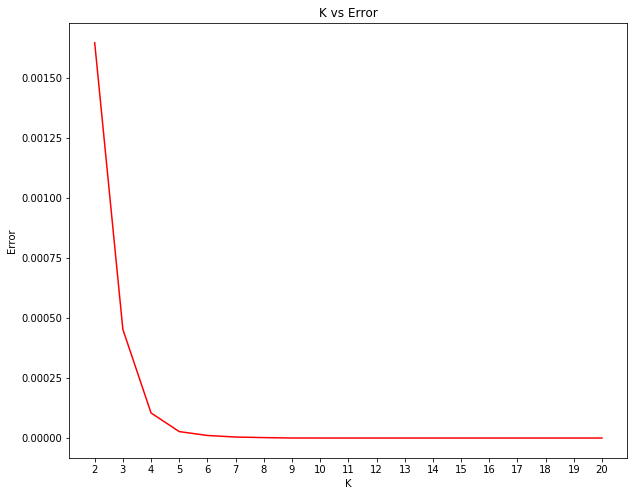

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [169]:
kclusters = 4

toronto_grouped_clustering = fd.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [170]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = fd.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_
to_merged.head()

,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels
0,Agincourt,0.0,0
1,"Alderwood, Long Branch",0.0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0
3,Bayview Village,0.0,0
4,"Bedford Park, Lawrence Manor East",0.0,0


In [171]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighbourhood"), on="Neighbourhood")

print(to_merged.shape)
to_merged.head()

(2141, 9)


,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,0,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,0,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,0,43.7942,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
0,Agincourt,0.0,0,43.7942,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink


In [172]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2141, 9)


,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.000000,0,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
51,"Mimico NW, The Queensway West, South of Bloor,...",0.000000,0,43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
51,"Mimico NW, The Queensway West, South of Bloor,...",0.000000,0,43.628841,-79.520999,McDonald's,43.630002,-79.518198,Fast Food Restaurant
51,"Mimico NW, The Queensway West, South of Bloor,...",0.000000,0,43.628841,-79.520999,Subway,43.631659,-79.519001,Sandwich Place
51,"Mimico NW, The Queensway West, South of Bloor,...",0.000000,0,43.628841,-79.520999,7-Eleven,43.629107,-79.517431,Convenience Store
...,...,...,...,...,...,...,...,...,...
43,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Fudao Noodle House,43.654645,-79.398874,Noodle House
43,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Torteria San Cosme,43.654702,-79.400646,Mexican Restaurant
43,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Saigon Lotus Restaurant,43.654311,-79.399225,Vietnamese Restaurant
43,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Thai Country Kitchen,43.656159,-79.399423,Thai Restaurant


In [173]:
to_merged['Venue Category'].value_counts()["Vegetarian / Vegan Restaurant"]

16

In [174]:
 map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighbourhood Latitude'], to_merged['Neighbourhood Longitude'], to_merged['Neighbourhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### Neighborhoods per Cluster ###

In [175]:
fd["Cluster Labels"] = kmeans.labels_
fd.head()

,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels
0,Agincourt,0.0,0
1,"Alderwood, Long Branch",0.0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0
3,Bayview Village,0.0,0
4,"Bedford Park, Lawrence Manor East",0.0,0


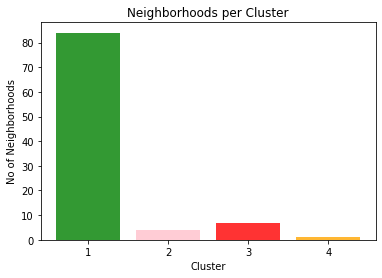

In [176]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = fd['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['green', 'pink','red', 'orange'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Neighborhoods per Cluster')

plt.show()

In [177]:
# Neighborhoods in each cluster
fd['Cluster Labels'].value_counts()

0    84
2     7
1     4
3     1
Name: Cluster Labels, dtype: int64

In [178]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighbourhood']]
df_new.head()

,Borough,Neighbourhood
0,Scarborough,"Malvern, Rouge"
1,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,Scarborough,"Guildwood, Morningside, West Hill"
3,Scarborough,Woburn
4,Scarborough,Cedarbrae


# Analysis of each Cluster #

### Cluster1 ###

In [179]:
clus1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_clus1 = pd.merge(df_new, clus1, on='Neighbourhood')
df_clus1

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,"Malvern, Rouge",0.0,0,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",0.0,0,43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
2,Scarborough,"Rouge Hill, Port Union, Highland Creek",0.0,0,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Scarborough,"Guildwood, Morningside, West Hill",0.0,0,43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot
4,Scarborough,"Guildwood, Morningside, West Hill",0.0,0,43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
...,...,...,...,...,...,...,...,...,...,...
1251,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",0.0,0,43.739416,-79.588437,Shoppers Drug Mart,43.741685,-79.584487,Pharmacy
1252,Etobicoke,"Northwest, West Humber - Clairville",0.0,0,43.706748,-79.594054,Saand Rexdale,43.705072,-79.598725,Drugstore
1253,Etobicoke,"Northwest, West Humber - Clairville",0.0,0,43.706748,-79.594054,Logistics Distribution,43.707554,-79.589252,Bar
1254,Etobicoke,"Northwest, West Humber - Clairville",0.0,0,43.706748,-79.594054,Economy Rent A Car,43.708471,-79.589943,Rental Car Location


### Clus2 ###

In [180]:
clus2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_clus2 = pd.merge(df_new, clus2, on='Neighbourhood')
df_clus2

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,The Reservoir Lounge,43.648517,-79.374556,Jazz Club
1,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
2,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Garrison Bespoke,43.648102,-79.376334,Tailor Shop
3,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Crepe It Up!,43.648736,-79.371623,Creperie
4,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Balzac's Coffee,43.648457,-79.371790,Café
...,...,...,...,...,...,...,...,...,...,...
228,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Wibke's Espresso Bar,43.649132,-79.484802,Coffee Shop
229,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Bryden's Pub,43.649259,-79.484651,Pub
230,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Asa Sushi,43.649902,-79.484611,Sushi Restaurant
231,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Coffee Tree Roastery,43.649647,-79.483436,Café


In [181]:
df_clus2.sort_values(["Vegetarian / Vegan Restaurant"], ascending=False)

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
232,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Fat Bastard Burrito,43.649779,-79.482894,Burrito Place
208,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Max's Market,43.650525,-79.479145,Gourmet Shop
214,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Java Joe's,43.650424,-79.479755,Café
213,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,Bloor-Jane Restaurant,43.649513,-79.484070,Diner
212,West Toronto,"Runnymede, Swansea",0.030303,1,43.651571,-79.484450,RBC Royal Bank,43.650142,-79.480274,Bank
...,...,...,...,...,...,...,...,...,...,...
34,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Oyshi Sushi,43.642340,-79.375853,Sushi Restaurant
33,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Brookfield Place,43.646791,-79.378769,Shopping Mall
32,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Scotland Yard Pub,43.647053,-79.374060,Pub
31,Downtown Toronto,Berczy Park,0.018182,1,43.644771,-79.373306,Spirit of Hockey,43.647047,-79.377537,Sporting Goods Shop


In [182]:
df_clus2['Venue Category'].value_counts(ascending=False)["Vegetarian / Vegan Restaurant"]

5

### Cluster3 ###

In [183]:
clus3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_clus3 = pd.merge(df_new, clus3, on='Neighbourhood')
df_clus3

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,St. James Town,0.011765,2,43.651494,-79.375418,Richmond Station,43.651569,-79.379266,American Restaurant
1,Downtown Toronto,St. James Town,0.011765,2,43.651494,-79.375418,Beerbistro,43.649419,-79.377237,Gastropub
2,Downtown Toronto,St. James Town,0.011765,2,43.651494,-79.375418,The Poet Cafe,43.650637,-79.371276,Café
3,Downtown Toronto,St. James Town,0.011765,2,43.651494,-79.375418,Sukhothai,43.648487,-79.374547,Thai Restaurant
4,Downtown Toronto,St. James Town,0.011765,2,43.651494,-79.375418,Craft Beer Market,43.649872,-79.378398,Beer Bar
...,...,...,...,...,...,...,...,...,...,...
644,Downtown Toronto,"First Canadian Place, Underground city",0.010000,2,43.648429,-79.382280,Bay Adelaide Centre,43.650879,-79.380003,Office
645,Downtown Toronto,"First Canadian Place, Underground city",0.010000,2,43.648429,-79.382280,Copacabana Grilled Brazilian,43.648333,-79.388151,Brazilian Restaurant
646,Downtown Toronto,"First Canadian Place, Underground city",0.010000,2,43.648429,-79.382280,McEwan Foods,43.647160,-79.381044,Deli / Bodega
647,Downtown Toronto,"First Canadian Place, Underground city",0.010000,2,43.648429,-79.382280,Piper's Gastropub,43.645468,-79.381779,Cocktail Bar


#### Cluster4 ###

In [184]:
clus4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_clus4 = pd.merge(df_new, clus4, on='Neighbourhood')
df_clus4

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,El Trompo,43.655832,-79.402561,Mexican Restaurant
1,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Essence of Life Organics,43.654111,-79.400431,Organic Grocery
2,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Wanda's Pie in the Sky,43.656163,-79.402630,Bakery
3,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Krispy Kreme Doughnuts,43.655834,-79.399417,Donut Shop
4,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,A & C World,43.657409,-79.399847,Gaming Cafe
...,...,...,...,...,...,...,...,...,...,...
69,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Fudao Noodle House,43.654645,-79.398874,Noodle House
70,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Torteria San Cosme,43.654702,-79.400646,Mexican Restaurant
71,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Saigon Lotus Restaurant,43.654311,-79.399225,Vietnamese Restaurant
72,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,3,43.653206,-79.400049,Thai Country Kitchen,43.656159,-79.399423,Thai Restaurant


### Cluster mean ####

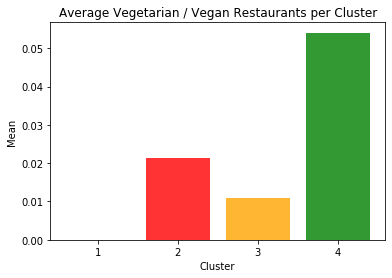

In [185]:
clusters_mean = [df_clus1["Vegetarian / Vegan Restaurant"].mean(),df_clus2["Vegetarian / Vegan Restaurant"].mean(),df_clus3["Vegetarian / Vegan Restaurant"].mean(),
                 df_clus4["Vegetarian / Vegan Restaurant"].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['black', 'red','orange', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average Vegetarian / Vegan Restaurants per Cluster')

plt.show()